In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import curve_fit

In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [4]:
xlsx = pd.ExcelFile('koronavirus-i-matematika-07-Hrvatska.xlsx')
df = pd.read_excel(xlsx, 'Hrvatska detaljno')
df

,Datum,broj potvrđeno zaraženih,razlika = broj novozaraženih,Prosječna razlika (zadnjih 7 dana),Standardna devijacija (zadnjih 7 dana),Koeficijent varijacije (zadnjih 7 dana),omjer u odnosu na prethodni dan,postotna promjena u odnosu na prethodni dan,Prosječan omjer (zadnjih 7 dana),Prosječna dnevna postotna promjena (zadnjih 7 dana)
0,2020-02-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,3,2.0,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
3,2020-02-27,3,0.0,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
4,2020-02-28,5,2.0,NaN,NaN,NaN,1.666667,0.666667,NaN,NaN
5,2020-02-29,6,1.0,NaN,NaN,NaN,1.200000,0.200000,NaN,NaN
6,2020-03-01,7,1.0,NaN,NaN,NaN,1.166667,0.166667,NaN,NaN
7,2020-03-02,7,0.0,1.000000,0.816497,0.816497,1.000000,0.000000,NaN,NaN
8,2020-03-03,9,2.0,1.142857,0.899735,0.787268,1.285714,0.285714,1.368738,0.368738
9,2020-03-04,10,1.0,1.000000,0.816497,0.816497,1.111111,0.111111,1.187673,0.187673


In [5]:
novi=list()
i=23.2

for x in range(6):
    i+=1
    novi.append(f'{i}.')


j=0.3
for x in range(26):
    j+=1
    novi.append(f'{j}.')
    

broj=list()
for x in range(32):
    broj.append(x)


df['Novi_datum']=novi
df['Brojevi']=broj
df

,Datum,broj potvrđeno zaraženih,razlika = broj novozaraženih,Prosječna razlika (zadnjih 7 dana),Standardna devijacija (zadnjih 7 dana),Koeficijent varijacije (zadnjih 7 dana),omjer u odnosu na prethodni dan,postotna promjena u odnosu na prethodni dan,Prosječan omjer (zadnjih 7 dana),Prosječna dnevna postotna promjena (zadnjih 7 dana),Novi_datum,Brojevi
0,2020-02-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2.,0
1,2020-02-25,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2.,1
2,2020-02-26,3,2.0,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,26.2.,2
3,2020-02-27,3,0.0,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,27.2.,3
4,2020-02-28,5,2.0,NaN,NaN,NaN,1.666667,0.666667,NaN,NaN,28.2.,4
5,2020-02-29,6,1.0,NaN,NaN,NaN,1.200000,0.200000,NaN,NaN,29.2.,5
6,2020-03-01,7,1.0,NaN,NaN,NaN,1.166667,0.166667,NaN,NaN,1.3.,6
7,2020-03-02,7,0.0,1.000000,0.816497,0.816497,1.000000,0.000000,NaN,NaN,2.3.,7
8,2020-03-03,9,2.0,1.142857,0.899735,0.787268,1.285714,0.285714,1.368738,0.368738,3.3.,8
9,2020-03-04,10,1.0,1.000000,0.816497,0.816497,1.111111,0.111111,1.187673,0.187673,4.3.,9


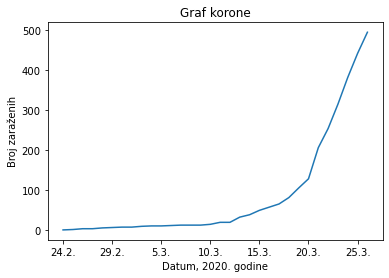

In [11]:
fig, ax = plt.subplots()
ax.plot(df.Novi_datum, df['broj potvrđeno zaraženih'])
plt.title( 'Graf korone' )
plt.xlabel('Datum, 2020. godine')
plt.ylabel('Broj zaraženih')
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.show()

In [12]:
def func(x, a, b):
    return a**x+b

In [16]:
popt, pcov=curve_fit(func, df.Brojevi, df['broj potvrđeno zaraženih'])
popt

array([ 1.22446428, -2.85711335])

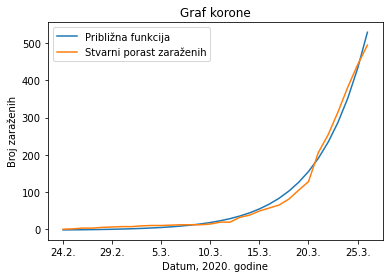

In [19]:
fig, ax = plt.subplots()
ax.plot(df.Novi_datum, func(df.Brojevi, *popt))
ax.plot(df.Novi_datum, df['broj potvrđeno zaraženih'])
plt.title( 'Graf korone' )
plt.xlabel('Datum, 2020. godine')
plt.ylabel('Broj zaraženih')
plt.legend(['Približna funkcija','Stvarni porast zaraženih'])
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.show()